In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_information= pd.read_csv("Mall_Customers.csv")

In [3]:
customer_information.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
customer_information.shape

(200, 5)

In [5]:
customer_information.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
customer_information.shape

(200, 5)

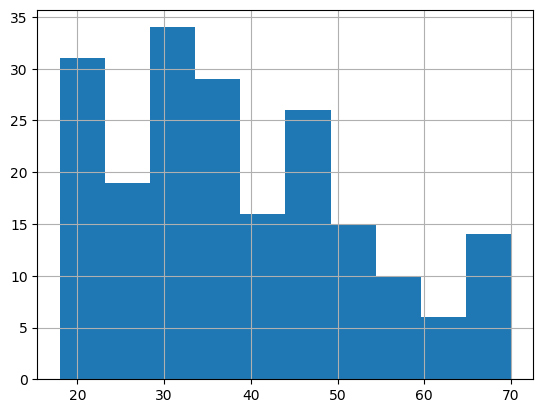

In [7]:
plt.style.use("default")
customer_information["Age"].hist()

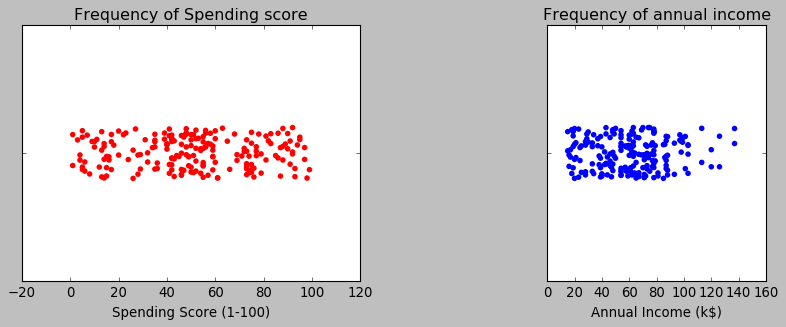

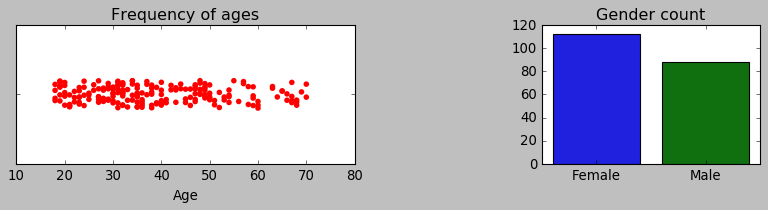

In [8]:
#plots of features of customer_information data set
#plot of spending score
plt.style.use("classic")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Frequency of Spending score")
sns.stripplot(x=customer_information["Spending Score (1-100)"], color="red")

#plot of annual income
plt.subplot(1,3,3)
plt.title("Frequency of annual income")
sns.stripplot(x=customer_information["Annual Income (k$)"])
plt.show()

#plot of frequency of ages
plt.style.use("classic")
plt.figure(figsize=(12,10))
plt.subplot(4,2,1)
plt.title("Frequency of ages")
sns.stripplot(x=customer_information["Age"], color="red")

#plot of gender count
genders = customer_information.Gender.value_counts()
plt.subplot(4,3,3)
plt.title("Gender count")

sns.barplot(x=genders.index, y=genders.values)
plt.show()


In [9]:
customer_information.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


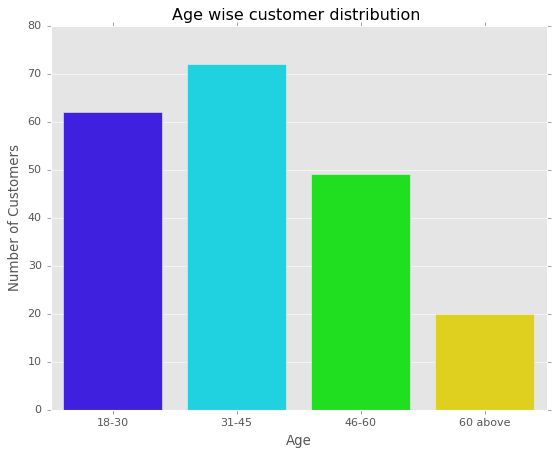

In [10]:
# plot of ages of customer vs number of customers
age1 = customer_information.Age[(customer_information.Age <= 30) & (customer_information.Age >= 18)]
age2 = customer_information.Age[(customer_information.Age <= 45) & (customer_information.Age >= 31)]
age3 = customer_information.Age[(customer_information.Age <= 60) & (customer_information.Age >= 46)]
age4 = customer_information.Age[(customer_information.Age >= 60)] 
plt.style.use("ggplot")
x = ["18-30","31-45","46-60","60 above"]
y = [len(age1.values),len(age2.values),len(age3.values),len(age4.values)]

plt.figure(figsize=(8,6))
sns.barplot(x=x, y=y, palette="gist_rainbow_r")
plt.title("Age wise customer distribution ")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

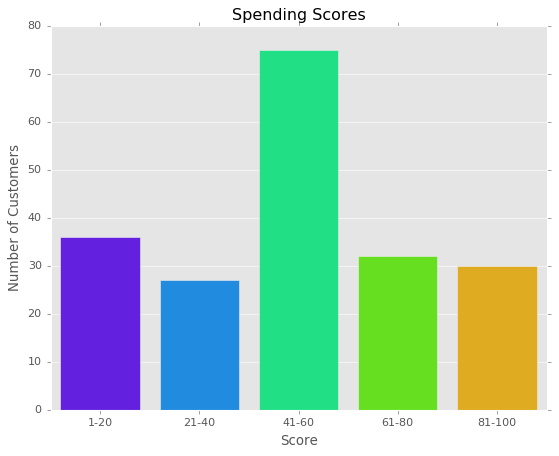

In [11]:
#plot of spending score of customer vs number of customers
df=customer_information
score1 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
score2 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
score3 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
score4 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
score5 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

scorex = ["1-20", "21-40", "41-60", "61-80", "81-100"]
scorey = [len(score1.values), len(score2.values), len(score3.values), len(score4.values), len(score5.values)]

plt.figure(figsize=(8,6))
sns.barplot(x=scorex, y=scorey, palette="gist_rainbow_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers")
plt.show()

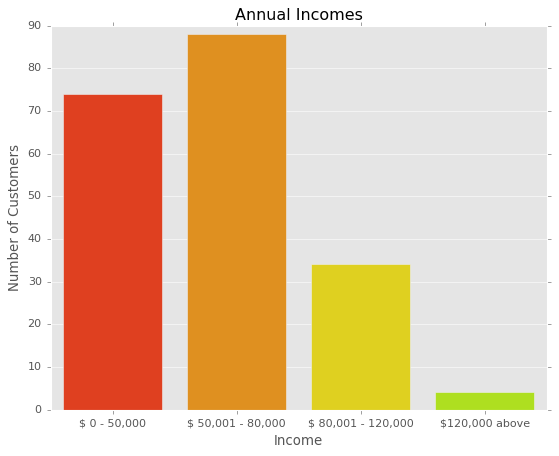

In [12]:
#plot of annual income of customer vs number of customers
df=customer_information
income1 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 50)]
income2 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 51) & (df["Annual Income (k$)"] <= 80)]
income3= df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 81) & (df["Annual Income (k$)"] <= 120)]
income4 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121)]

incomex = ["$ 0 - 50,000", "$ 50,001 - 80,000", "$ 80,001 - 120,000", "$120,000 above"]
incomey = [len(income1.values), len(income2.values), len(income3.values), len(income4.values)]

plt.figure(figsize=(8,6))
sns.barplot(x=incomex, y=incomey, palette="prism")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

## customer segmentation(clusters) based on annual income and spending score

In [13]:
#Select the annual income and the spending score columns
X=customer_information.iloc[:, [3,4]].values

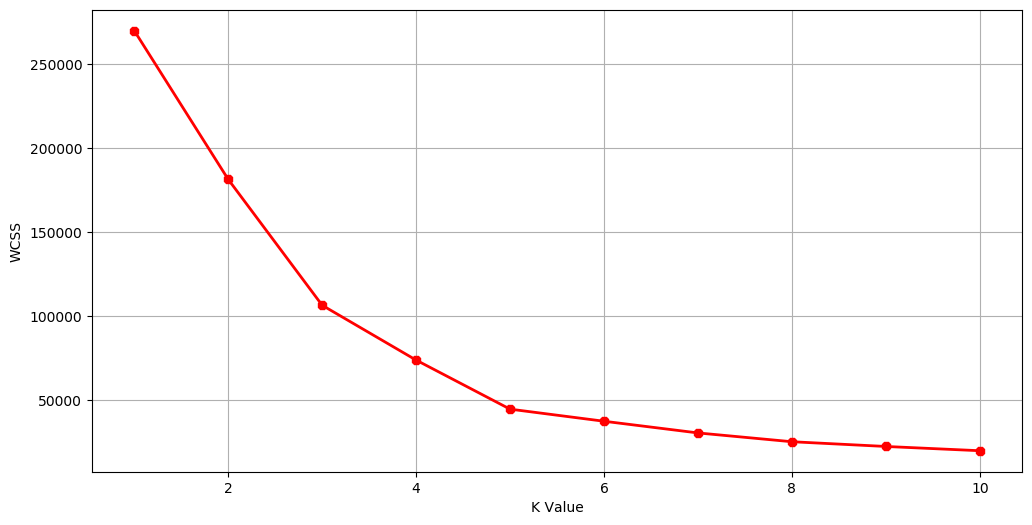

In [14]:
#use elbow method to find number of clusters 
plt.style.use("default")
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:, [3,4]])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [15]:
# take number of clusters as 5
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [16]:
y_kmeans = kmeans.fit_predict(X)

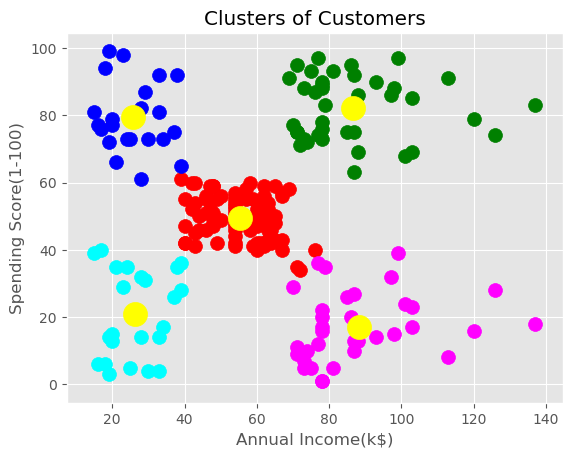

In [17]:
plt.style.use("ggplot")
# Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  
#attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

## customer segmentation(clusters) based on age and spending score

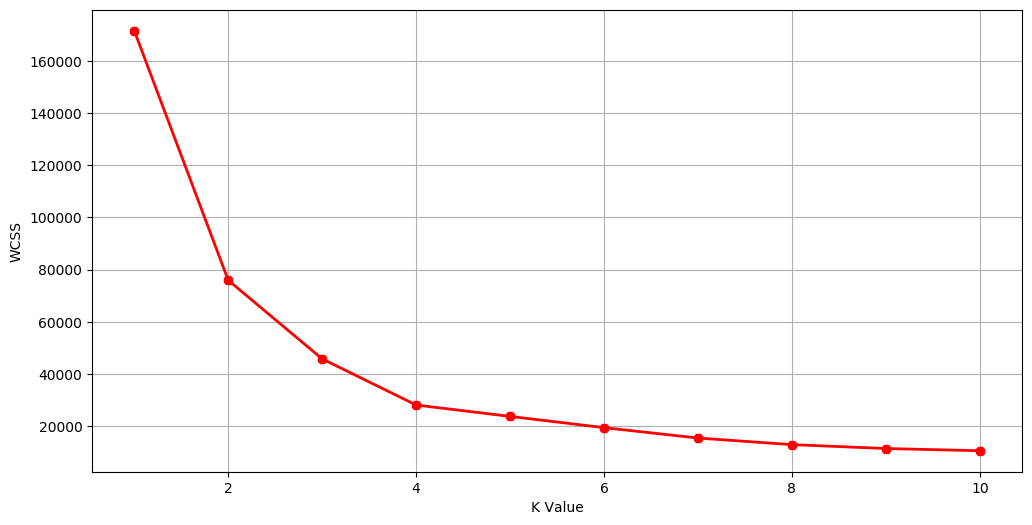

In [18]:
plt.style.use("default")
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:, [2,4]])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [20]:
X=customer_information.iloc[:, [2,4]].values
y_kmeans = kmeans.fit_predict(X)

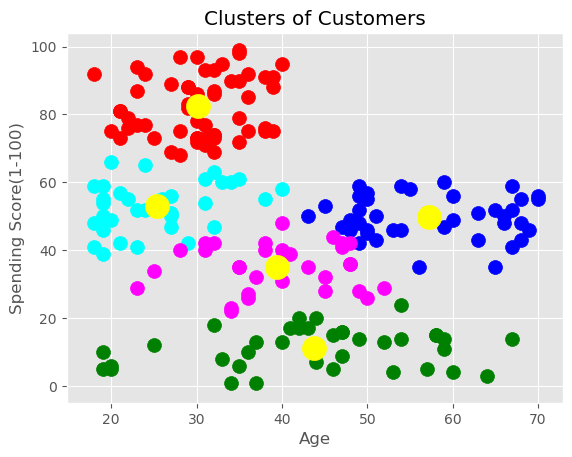

In [21]:
plt.style.use("ggplot")
# Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres 
#attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

## customer segmentation(clusters) based on age ,annual income and spending score

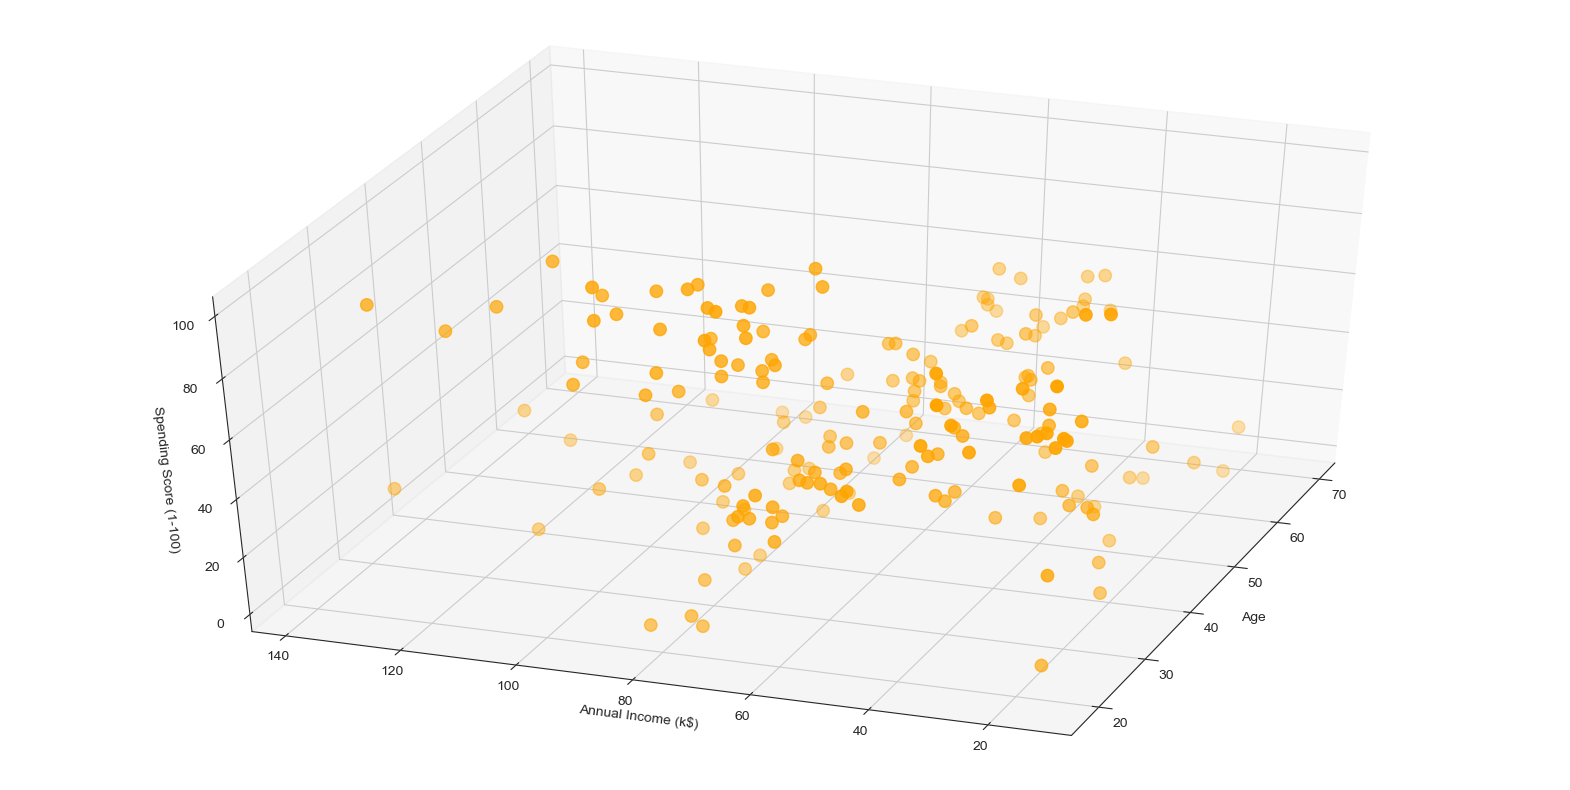

In [22]:
df=customer_information
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("default")
sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='orange', s=80)
ax.view_init(40, 200)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

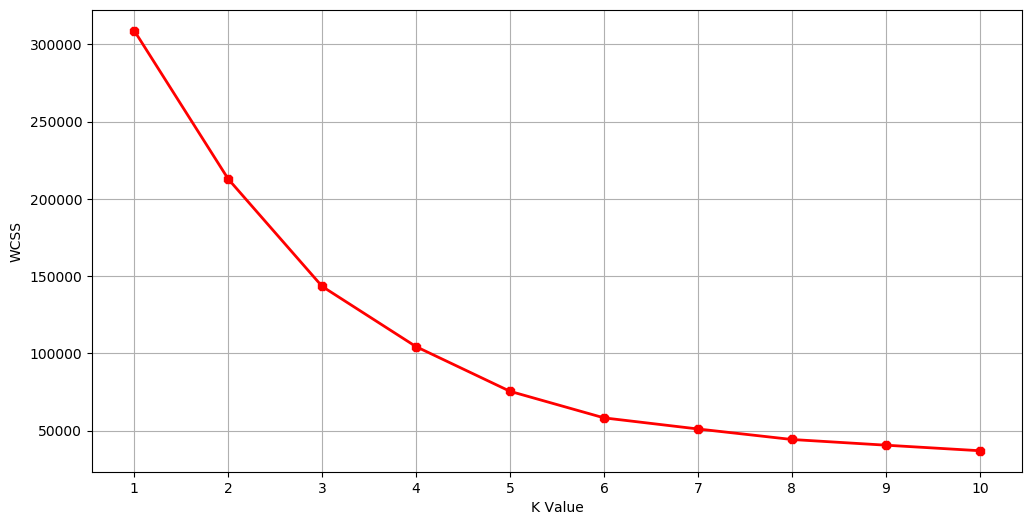

In [23]:
plt.style.use("default")
#elbow method to find number of clusters
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

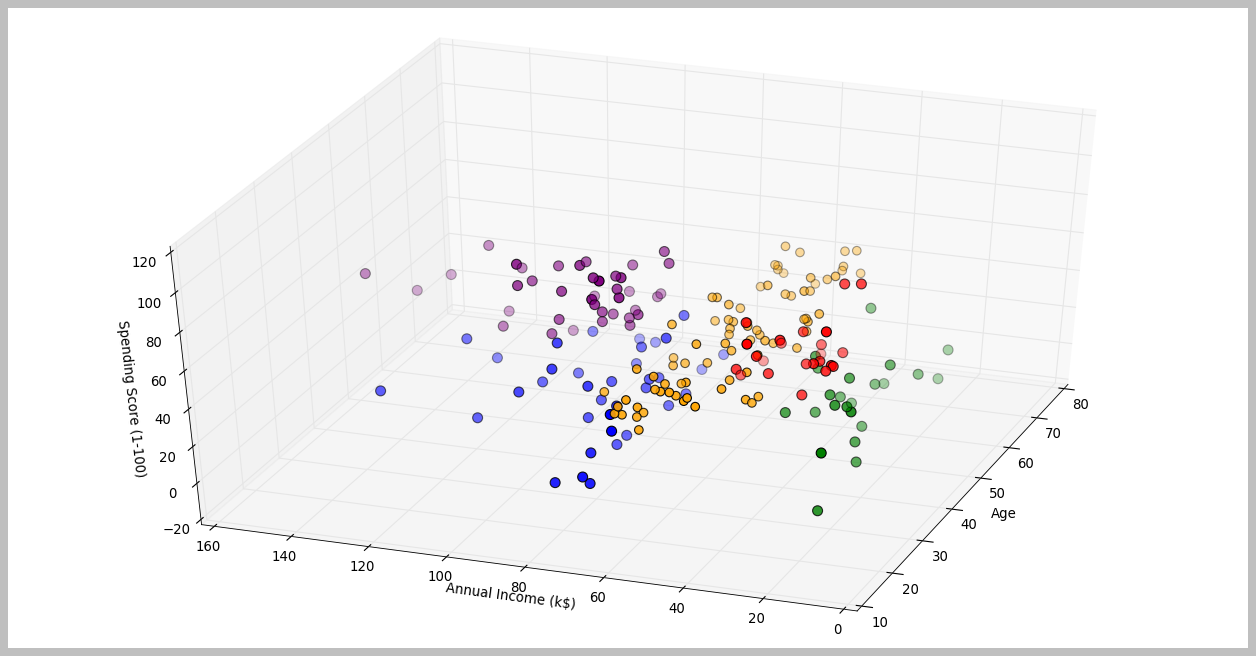

In [24]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,2:])

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use("classic")

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=80)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=80)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=80)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=80)
ax.view_init(40, 200)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()